In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
import swifter

c:\Users\phku0\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_parquet('data/text_preprocessed.parquet')
print(df.shape)
df.head()

(1904666, 2)


,title_preprocessed,summary_preprocessed
newsID,,
1,"[oil, price, could, determine, market, react, ...","[heavy, new, round, sanction, russia, ally, li..."
2,"[zoom, provide, disappointing, revenue, foreca...","[zoom, revenue, growth, continue, slow, busine..."
3,"[wall, street, rally, west, hit, russia, new, ...","[rise, end, four, day, slide, amid, worry, esc..."
4,"[weak, manufacturing, drag, gdp, growth, oil, ...","[india, economy, grow, three, month, end, dece..."
5,"[singapore, bank, halt, lend, russian, good, j...","[singapore, big, bank, restrict, trade, financ..."


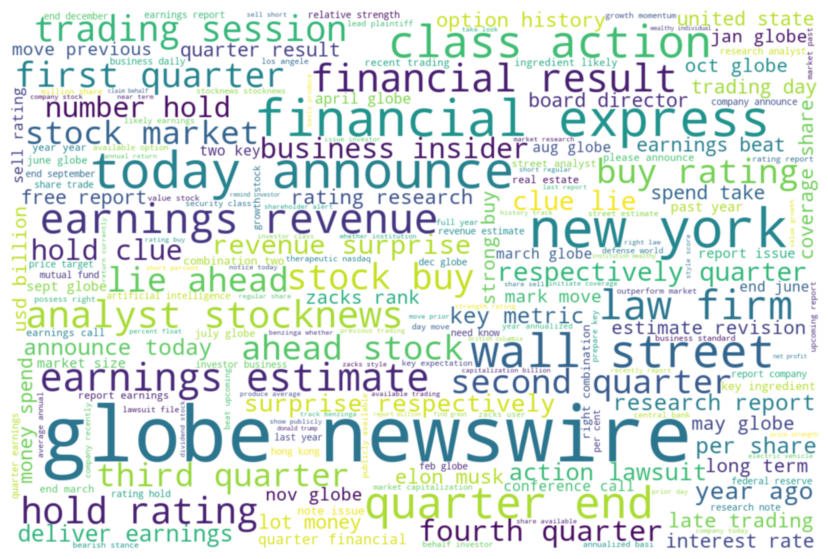

In [3]:
# count-based wordcloud

merged_text = (
  df['title_preprocessed'].apply(lambda tokens: ' '.join(tokens)) + ' ' +
  df['summary_preprocessed'].apply(lambda tokens: ' '.join(tokens))
)

allText = ' '.join(merged_text.tolist())
wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(allText)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.show()

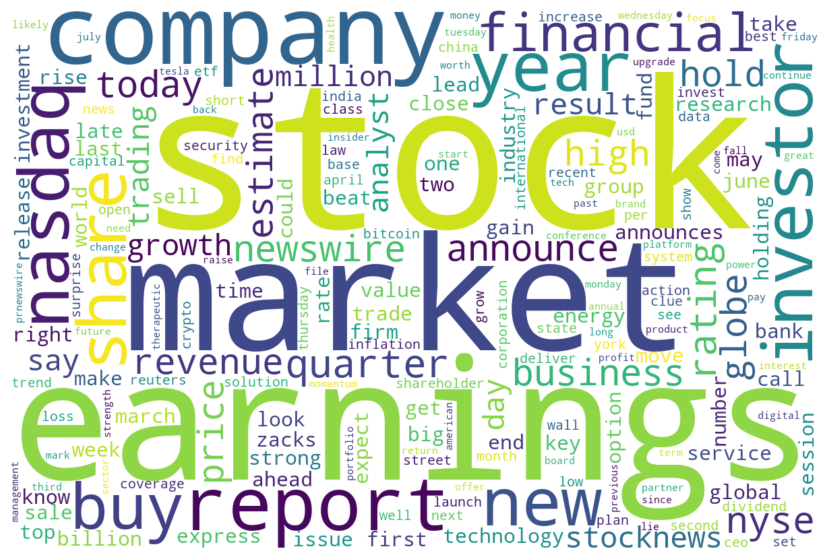

In [4]:
# tf-idf wordcloud

stop_words_list = nltk.corpus.stopwords.words("english")
tfidf_vectorizer = TfidfVectorizer(
    stop_words=stop_words_list,
    max_df=0.95,
    min_df=0.001,
    max_features=15000
)
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_text)

# Sum TF-IDF scores for each term across all documents
tfidf_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_dict = dict(zip(feature_names, tfidf_scores))

# Generate and display the word cloud based on TF-IDF weights
wordcloud = WordCloud(width=1200, height=800, background_color='white').generate_from_frequencies(tfidf_dict)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()